# Power Predict 

The first step is to upload the data and pre-process it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. We import the first file of the project 'Electricity_Data_Explorer.csv'

In [2]:
electricity_data_explorer = pd.read_csv('/Users/sylvainvanhuysse/code/VonRiecken/raw_data/Electricity_Data_Explorer.csv')

In [3]:
electricity_data_explorer

,Country,Time,Balance,Product,Value,Unit
0,Australia,July 2023,Net Electricity Production,Electricity,22460.2248,GWh
1,Australia,July 2023,Net Electricity Production,Total Combustible Fuels,15153.4307,GWh
2,Australia,July 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",10684.9635,GWh
3,Australia,July 2023,Net Electricity Production,Oil and Petroleum Products,360.4031,GWh
4,Australia,July 2023,Net Electricity Production,Natural Gas,3848.6375,GWh
...,...,...,...,...,...,...
134466,IEA Total,January 2010,Total Imports,Electricity,34846.5580,GWh
134467,IEA Total,January 2010,Total Exports,Electricity,32372.5830,GWh
134468,IEA Total,January 2010,Used for pumped storage,Electricity,6869.2530,GWh
134469,IEA Total,January 2010,Distribution Losses,Electricity,62000.7330,GWh


In [4]:
products = electricity_data_explorer['Product'].unique()
##products

### We create a list to be used as a filter on specific countries:

In [5]:
##filter_countries = ['Australia', 'Germany']

##['Germany', 'Argentina', 'Mexico', 'Canada', 'Spain', 'Norway', 'England', 'Tunisia', 'Morocco', 'Nigeria', 
            ## 'South Africa', 'Angola', 'Turkey', 'Iran', 'Australia', 'Thailand', 'Japan', 'South Korea', 'Liberia', 'France']

### We create a list to be used as a filter on the outputs:

In [6]:
filter_balance = ['Net Electricity Production']
                  ##, 'Final Consumption (Calculated)']

### We create a list to be used as a filter on the different sources of energy:

In [7]:
filter_products = ['Combustible Renewables', 'Hydro', 'Wind', 'Solar',
                   'Total Renewables (Hydro, Geo, Solar, Wind, Other)', 'Other Renewables']

### We apply the filters to the initial dataframe:

In [8]:
electricity_data_explorer = electricity_data_explorer[electricity_data_explorer['Product'].isin(filter_products)]
## electricity_data_explorer

In [9]:
##electricity_data_explorer = electricity_data_explorer[electricity_data_explorer['Country'].isin(filter_countries)]

In [10]:
electricity_data_explorer = electricity_data_explorer[electricity_data_explorer['Balance'].isin(filter_balance)]
##electricity_data_explorer

### Reordering the columns

In [11]:
electricity_data_explorer = electricity_data_explorer[['Time', 'Country', 'Balance','Product','Value']]
electricity_data_explorer

,Time,Country,Balance,Product,Value
5,July 2023,Australia,Net Electricity Production,Combustible Renewables,259.4267
6,July 2023,Australia,Net Electricity Production,Hydro,1775.1418
7,July 2023,Australia,Net Electricity Production,Wind,3216.3408
8,July 2023,Australia,Net Electricity Production,Solar,2315.3114
9,July 2023,Australia,Net Electricity Production,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",7566.2207
...,...,...,...,...,...
134459,January 2010,IEA Total,Net Electricity Production,Hydro,127518.5190
134460,January 2010,IEA Total,Net Electricity Production,Wind,21659.6120
134461,January 2010,IEA Total,Net Electricity Production,Solar,1129.1400
134463,January 2010,IEA Total,Net Electricity Production,Other Renewables,41.0500


### Reindexing the dataframe

In [12]:
electricity_data_explorer.index = range(len(electricity_data_explorer.index))
electricity_data_explorer

,Time,Country,Balance,Product,Value
0,July 2023,Australia,Net Electricity Production,Combustible Renewables,259.4267
1,July 2023,Australia,Net Electricity Production,Hydro,1775.1418
2,July 2023,Australia,Net Electricity Production,Wind,3216.3408
3,July 2023,Australia,Net Electricity Production,Solar,2315.3114
4,July 2023,Australia,Net Electricity Production,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",7566.2207
...,...,...,...,...,...
41957,January 2010,IEA Total,Net Electricity Production,Hydro,127518.5190
41958,January 2010,IEA Total,Net Electricity Production,Wind,21659.6120
41959,January 2010,IEA Total,Net Electricity Production,Solar,1129.1400
41960,January 2010,IEA Total,Net Electricity Production,Other Renewables,41.0500


In [13]:
electricity_data_explorer = electricity_data_explorer.pivot_table('Value', ['Time','Country', 'Balance'], 'Product')

In [14]:
electricity_data_explorer = electricity_data_explorer.fillna(0)
electricity_data_explorer

Product                                                   Combustible Renewables  \
Time           Country        Balance                                              
April 2010     Australia      Net Electricity Production                216.2870   
               Austria        Net Electricity Production                350.3830   
               Belgium        Net Electricity Production                383.1770   
               Canada         Net Electricity Production                712.9880   
               Chile          Net Electricity Production                152.8260   
...                                                                          ...   
September 2022 Spain          Net Electricity Production                478.4796   
               Sweden         Net Electricity Production                819.7182   
               Switzerland    Net Electricity Production                173.8267   
               United Kingdom Net Electricity Production               3122.6177   
               United States  Net Electricity Production               4322.0950   

Product                                                        Hydro  \
Time           Country        Balance                                  
April 2010     Australia      Net Electricity Production   1044.4060   
               Austria        Net Electricity Production   2504.1300   
               Belgium        Net Electricity Production    141.8980   
               Canada         Net Electricity Production  28243.7380   
               Chile          Net Electricity Production   1740.4160   
...                                                              ...   
September 2022 Spain          Net Electricity Production   1459.6225   
               Sweden         Net Electricity Production   5992.2339   
               Switzerland    Net Electricity Production   2753.3512   
               United Kingdom Net Electricity Production    367.4721   
               United States  Net Electricity Production  18246.4312   

Product                                                   Other Renewables  \
Time           Country        Balance                                        
April 2010     Australia      Net Electricity Production            0.0000   
               Austria        Net Electricity Production            0.0000   
               Belgium        Net Electricity Production            0.0000   
               Canada         Net Electricity Production            2.4400   
               Chile          Net Electricity Production            0.0000   
...                                                                    ...   
September 2022 Spain          Net Electricity Production            1.5000   
               Sweden         Net Electricity Production            0.0000   
               Switzerland    Net Electricity Production            0.0000   
               United Kingdom Net Electricity Production            0.4559   
               United States  Net Electricity Production            0.0000   

Product                                                        Solar  \
Time           Country        Balance                                  
April 2010     Australia      Net Electricity Production     26.8110   
               Austria        Net Electricity Production      9.9650   
               Belgium        Net Electricity Production     80.4190   
               Canada         Net Electricity Production     24.1840   
               Chile          Net Electricity Production      0.0000   
...                                                              ...   
September 2022 Spain          Net Electricity Production   3213.8391   
               Sweden         Net Electricity Production    101.3747   
               Switzerland    Net Electricity Production    337.7122   
               United Kingdom Net Electricity Production   1385.7783   
               United States  Net Electricity Production  17437.4229   

Product           

In [15]:
electricity_data_explorer = electricity_data_explorer.reset_index()
electricity_data_explorer

Product,Time,Country,Balance,Combustible Renewables,Hydro,Other Renewables,Solar,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",Wind
0,April 2010,Australia,Net Electricity Production,216.2870,1044.4060,0.0000,26.8110,1638.0980,350.5110
1,April 2010,Austria,Net Electricity Production,350.3830,2504.1300,0.0000,9.9650,2995.6960,131.1070
2,April 2010,Belgium,Net Electricity Production,383.1770,141.8980,0.0000,80.4190,702.5090,97.0150
3,April 2010,Canada,Net Electricity Production,712.9880,28243.7380,2.4400,24.1840,29709.3010,725.9510
4,April 2010,Chile,Net Electricity Production,152.8260,1740.4160,0.0000,0.0000,1913.6010,20.3590
...,...,...,...,...,...,...,...,...,...
7794,September 2022,Spain,Net Electricity Production,478.4796,1459.6225,1.5000,3213.8391,9351.9487,4198.5075
7795,September 2022,Sweden,Net Electricity Production,819.7182,5992.2339,0.0000,101.3747,8900.2441,1986.9173
7796,September 2022,Switzerland,Net Electricity Production,173.8267,2753.3512,0.0000,337.7122,3276.0098,11.1196
7797,September 2022,United Kingdom,Net Electricity Production,3122.6177,367.4721,0.4559,1385.7783,10397.5687,5521.2446


In [16]:
electricity_data_explorer['Time'].min()

'April 2010'

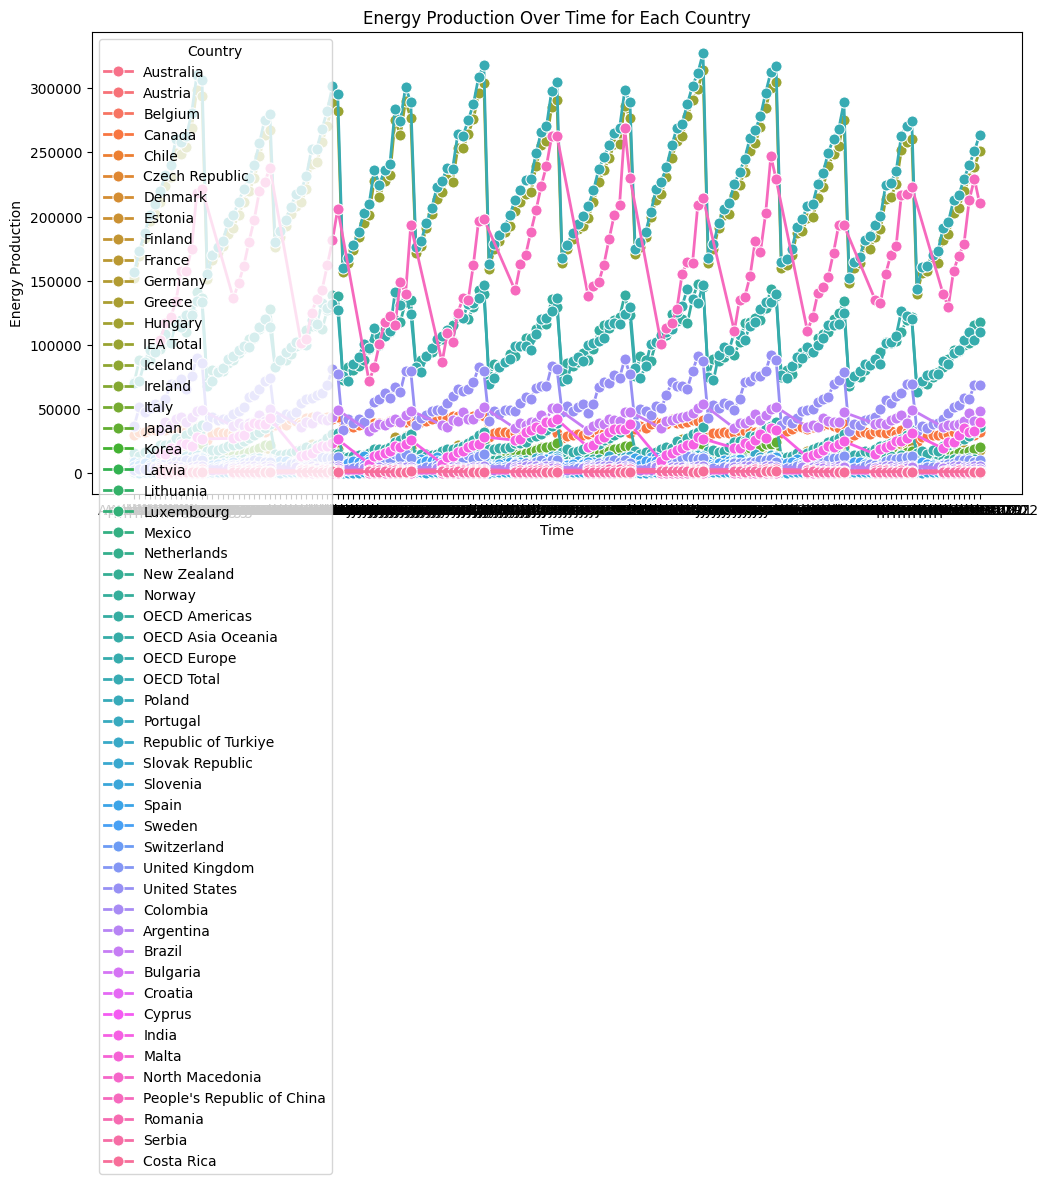

In [17]:
# Create the Seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Total Renewables (Hydro, Geo, Solar, Wind, Other)', hue='Country', data=electricity_data_explorer, marker='o', markersize=8, linewidth=2)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Energy Production')
plt.title('Energy Production Over Time for Each Country')

# Show the legend
plt.legend(title='Country')

# Show the plot
plt.show()

In [18]:
specific_country = 'Canada'
filtered_df = electricity_data_explorer[electricity_data_explorer['Country'] == specific_country]


In [19]:
df = electricity_data_explorer

features = ['Combustible Renewables', 'Hydro', 'Wind', 'Solar',
            'Total Renewables (Hydro, Geo, Solar, Wind, Other)', 'Other Renewables']

##df['Time'] = df.index.month
combustible_renewables = df[['Time', 'Country','Combustible Renewables']]
hydro = df[['Time', 'Country','Hydro']]
wind= df[['Time', 'Country','Wind']]
solar = df[['Time', 'Country','Solar']]
total_renewables = df[['Time', 'Country','Total Renewables (Hydro, Geo, Solar, Wind, Other)']]
other_renewables = df[['Time', 'Country','Other Renewables']]

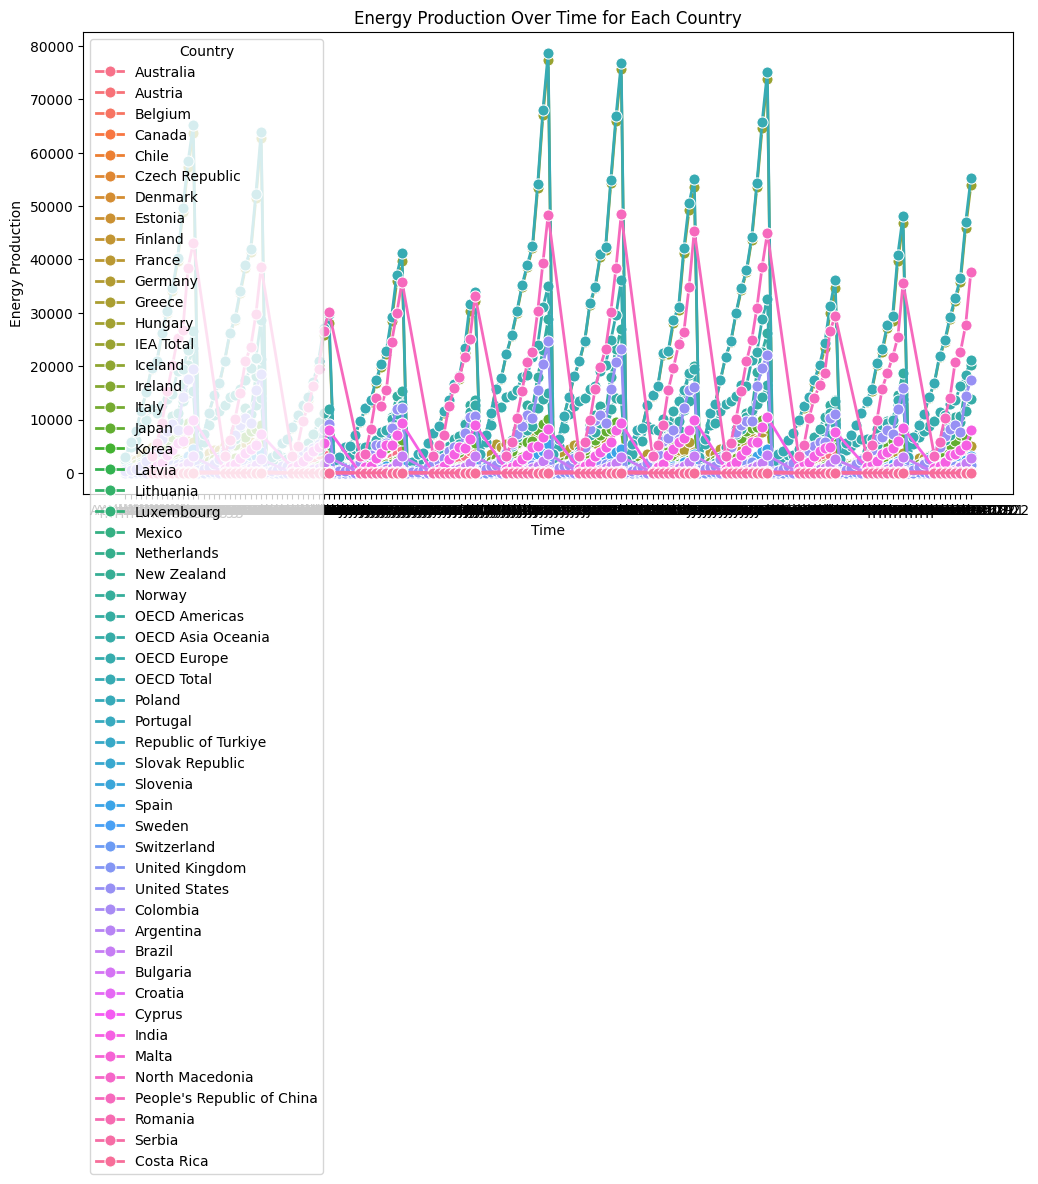

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Solar', hue='Country', data=solar, marker='o', markersize=8, linewidth=2)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Energy Production')
plt.title('Energy Production Over Time for Each Country')

# Show the legend
plt.legend(title='Country')

# Show the plot
plt.show()

## 2. Back-up file if missing data 'weather_data_temperature_radiation.csv' (we don't need it anymore!)

In [21]:
temp_radiation = pd.read_csv('/Users/sylvainvanhuysse/code/VonRiecken/raw_data/weather_data_temperature_radiation.csv')
temp_radiation = temp_radiation.loc[(temp_radiation['utc_timestamp'] >= '2010-01-01')] ## Data from 2010 on only
temp_radiation = temp_radiation.reset_index()
temp_radiation = temp_radiation.drop(['index'], axis=1)
##temp_radiation

In [22]:
temp_radiation_transposed = temp_radiation.transpose()
temp_radiation_transposed = temp_radiation_transposed.reset_index()
##temp_radiation_transposed

In [23]:
temp_radiation_transposed.rename({'index': 'prepar'}, inplace=True, axis=1)
##temp_radiation_transposed.head()

In [24]:
clean1 = temp_radiation_transposed['prepar'].unique()
##clean1

## 3. We import and clean all the files containing weather data

In [25]:
CDD_18 = pd.read_csv('/Users/sylvainvanhuysse/code/VonRiecken/raw_data/CDD_18.csv')
CDD_21 = pd.read_csv('/Users/sylvainvanhuysse/code/VonRiecken/raw_data/CDD_21.csv')
Global_Horizontal_Irrandiance = pd.read_csv('/Users/sylvainvanhuysse/code/VonRiecken/raw_data/Global_Horizontal_Irrandiance.csv')
HDD_16 = pd.read_csv('/Users/sylvainvanhuysse/code/VonRiecken/raw_data/HDD_16.csv')
HDD_18 = pd.read_csv('/Users/sylvainvanhuysse/code/VonRiecken/raw_data/HDD_18.csv')
Heat_index = pd.read_csv('/Users/sylvainvanhuysse/code/VonRiecken/raw_data/Heat_index.csv')
Relative_Humidty = pd.read_csv('/Users/sylvainvanhuysse/code/VonRiecken/raw_data/Relative_Humidty.csv')
Temperature = pd.read_csv('/Users/sylvainvanhuysse/code/VonRiecken/raw_data/Temperature.csv')
Total_Precipitation = pd.read_csv('/Users/sylvainvanhuysse/code/VonRiecken/raw_data/Total_Precipitation.csv')

In [26]:
CDD_21

,Country,parameter,Jan-10,Feb-10,Mar-10,Apr-10,May-10,Jun-10,Jul-10,Aug-10,...,Dec-22,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23
0,Afghanistan,CDD_21,0.000000,0.08307,2.314,15.450,48.59000,98.1600,134.8000,99.830,...,0.0000,0.000000,0.03546,1.403,15.10,49.7700,128.700,138.200,105.10000,45.66
1,Aland Islands,CDD_21,0.000000,0.00000,0.000,0.000,0.00000,0.0000,3.2400,0.000,...,0.0000,0.000000,0.00000,0.000,0.00,0.0000,0.000,0.000,0.02232,0.00
2,Albania,CDD_21,0.000000,0.00000,0.000,0.000,0.66500,32.0400,71.2700,85.330,...,0.0000,0.000000,0.00000,0.000,0.00,0.3424,31.590,137.700,100.90000,42.45
3,Algeria,CDD_21,0.001021,1.12400,4.328,9.493,18.84000,80.8900,216.8000,198.300,...,0.3534,0.001849,0.12610,3.547,20.24,22.7400,123.300,313.400,222.50000,128.70
4,American Samoa,CDD_21,195.200000,176.00000,217.100,202.600,208.60000,186.6000,178.1000,167.900,...,180.0000,180.100000,166.50000,196.500,187.20,195.9000,186.000,179.200,188.50000,165.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Western Samoa,CDD_21,177.600000,155.60000,191.000,178.700,184.50000,160.9000,155.3000,144.400,...,159.2000,154.400000,144.80000,172.200,166.70,170.9000,161.900,156.400,166.40000,149.60
236,Yemen,CDD_21,26.380000,37.75000,74.910,121.400,155.80000,198.1000,169.4000,165.200,...,35.1100,30.180000,36.31000,65.820,104.00,143.8000,184.900,222.600,201.70000,181.80
237,Zambia,CDD_21,53.800000,43.36000,41.180,37.980,13.40000,1.7730,1.8050,6.524,...,47.6800,23.830000,47.29000,42.980,27.46,17.9900,8.414,2.042,29.22000,122.20
238,Zimbabwe,CDD_21,93.970000,64.69000,52.330,33.190,9.39900,0.1746,0.0387,1.820,...,67.1000,48.730000,46.45000,42.380,29.73,9.7020,4.627,0.649,18.06000,78.89


In [27]:
##list(CDD_18.columns)

In [28]:
## Converting the date columns into rows
CDD_18=pd.melt(CDD_18, id_vars=['Country','parameter'],value_vars=['Jan-10',
 'Feb-10','Mar-10','Apr-10','May-10','Jun-10','Jul-10', 'Aug-10','Sep-10','Oct-10', 'Nov-10', 'Dec-10','Jan-11', 'Feb-11',
 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12',
 'May-12','Jun-12','Jul-12','Aug-12', 'Sep-12','Oct-12','Nov-12', 'Dec-12','Jan-13',
 'Feb-13','Mar-13','Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14',
 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 
'Jul-15','Aug-15','Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16','Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16',
 'Oct-16','Nov-16','Dec-16','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17','Jan-18','Feb-18','Mar-18', 'Apr-18',
 'May-18','Jun-18', 'Jul-18', 'Aug-18','Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20','Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20',
 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21','Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22',
 'Apr-22','May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23',
 'May-23', 'Jun-23', 'Jul-23', 'Aug-23','Sep-23'],var_name='Month_year',value_name='value_CDD_18')
CDD_18

,Country,parameter,Month_year,value_CDD_18
0,Afghanistan,CDD_18,Jan-10,0.00264
1,Aland Islands,CDD_18,Jan-10,0.00000
2,Albania,CDD_18,Jan-10,0.00000
3,Algeria,CDD_18,Jan-10,0.06167
4,American Samoa,CDD_18,Jan-10,288.20000
...,...,...,...,...
39595,Western Samoa,CDD_18,Sep-23,239.60000
39596,Yemen,CDD_18,Sep-23,270.40000
39597,Zambia,CDD_18,Sep-23,211.90000
39598,Zimbabwe,CDD_18,Sep-23,160.90000


In [29]:
## Converting the date columns into rows
CDD_21=pd.melt(CDD_21, id_vars=['Country','parameter'],value_vars=['Jan-10',
 'Feb-10','Mar-10','Apr-10','May-10','Jun-10','Jul-10', 'Aug-10','Sep-10','Oct-10', 'Nov-10', 'Dec-10','Jan-11', 'Feb-11',
 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12',
 'May-12','Jun-12','Jul-12','Aug-12', 'Sep-12','Oct-12','Nov-12', 'Dec-12','Jan-13',
 'Feb-13','Mar-13','Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14',
 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 
'Jul-15','Aug-15','Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16','Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16',
 'Oct-16','Nov-16','Dec-16','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17','Jan-18','Feb-18','Mar-18', 'Apr-18',
 'May-18','Jun-18', 'Jul-18', 'Aug-18','Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20','Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20',
 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21','Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22',
 'Apr-22','May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23',
 'May-23', 'Jun-23', 'Jul-23', 'Aug-23','Sep-23'],var_name='Month_year',value_name='value_CDD_21')
CDD_21

,Country,parameter,Month_year,value_CDD_21
0,Afghanistan,CDD_21,Jan-10,0.000000
1,Aland Islands,CDD_21,Jan-10,0.000000
2,Albania,CDD_21,Jan-10,0.000000
3,Algeria,CDD_21,Jan-10,0.001021
4,American Samoa,CDD_21,Jan-10,195.200000
...,...,...,...,...
39595,Western Samoa,CDD_21,Sep-23,149.600000
39596,Yemen,CDD_21,Sep-23,181.800000
39597,Zambia,CDD_21,Sep-23,122.200000
39598,Zimbabwe,CDD_21,Sep-23,78.890000


In [30]:
## Converting the date columns into rows
Global_Horizontal_Irrandiance=pd.melt(Global_Horizontal_Irrandiance, id_vars=['Country','parameter'],value_vars=['Jan-10',
 'Feb-10','Mar-10','Apr-10','May-10','Jun-10','Jul-10', 'Aug-10','Sep-10','Oct-10', 'Nov-10', 'Dec-10','Jan-11', 'Feb-11',
 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12',
 'May-12','Jun-12','Jul-12','Aug-12', 'Sep-12','Oct-12','Nov-12', 'Dec-12','Jan-13',
 'Feb-13','Mar-13','Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14',
 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 
'Jul-15','Aug-15','Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16','Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16',
 'Oct-16','Nov-16','Dec-16','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17','Jan-18','Feb-18','Mar-18', 'Apr-18',
 'May-18','Jun-18', 'Jul-18', 'Aug-18','Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20','Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20',
 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21','Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22',
 'Apr-22','May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23',
 'May-23', 'Jun-23', 'Jul-23', 'Aug-23','Sep-23'],var_name='Month_year',value_name='value_Global_Horizontal_Irrandiance')
Global_Horizontal_Irrandiance

,Country,parameter,Month_year,value_Global_Horizontal_Irrandiance
0,Afghanistan,Global horizontal irradiance (surface),Jan-10,537602.0
1,Aland Islands,Global horizontal irradiance (surface),Jan-10,38074.0
2,Albania,Global horizontal irradiance (surface),Jan-10,260796.0
3,Algeria,Global horizontal irradiance (surface),Jan-10,652502.0
4,American Samoa,Global horizontal irradiance (surface),Jan-10,824779.0
...,...,...,...,...
39595,Western Samoa,Global horizontal irradiance (surface),Sep-23,858796.0
39596,Yemen,Global horizontal irradiance (surface),Sep-23,934137.0
39597,Zambia,Global horizontal irradiance (surface),Sep-23,1020724.0
39598,Zimbabwe,Global horizontal irradiance (surface),Sep-23,961252.0


In [31]:
## Converting the date columns into rows
HDD_16=pd.melt(HDD_16, id_vars=['Country','parameter'],value_vars=['Jan-10',
 'Feb-10','Mar-10','Apr-10','May-10','Jun-10','Jul-10', 'Aug-10','Sep-10','Oct-10', 'Nov-10', 'Dec-10','Jan-11', 'Feb-11',
 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12',
 'May-12','Jun-12','Jul-12','Aug-12', 'Sep-12','Oct-12','Nov-12', 'Dec-12','Jan-13',
 'Feb-13','Mar-13','Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14',
 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 
'Jul-15','Aug-15','Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16','Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16',
 'Oct-16','Nov-16','Dec-16','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17','Jan-18','Feb-18','Mar-18', 'Apr-18',
 'May-18','Jun-18', 'Jul-18', 'Aug-18','Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20','Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20',
 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21','Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22',
 'Apr-22','May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23',
 'May-23', 'Jun-23', 'Jul-23', 'Aug-23','Sep-23'],var_name='Month_year',value_name='value_HDD_16')
HDD_16

,Country,parameter,Month_year,value_HDD_16
0,Afghanistan,HDD_16,Jan-10,461.8000
1,Aland Islands,HDD_16,Jan-10,620.2000
2,Albania,HDD_16,Jan-10,325.8000
3,Algeria,HDD_16,Jan-10,173.1000
4,American Samoa,HDD_16,Jan-10,0.0000
...,...,...,...,...
39595,Western Samoa,HDD_16,Sep-23,0.0000
39596,Yemen,HDD_16,Sep-23,0.0000
39597,Zambia,HDD_16,Sep-23,0.0000
39598,Zimbabwe,HDD_16,Sep-23,0.8682


In [32]:
## Converting the date columns into rows
HDD_18=pd.melt(HDD_18, id_vars=['Country','parameter'],value_vars=['Jan-10',
 'Feb-10','Mar-10','Apr-10','May-10','Jun-10','Jul-10', 'Aug-10','Sep-10','Oct-10', 'Nov-10', 'Dec-10','Jan-11', 'Feb-11',
 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12',
 'May-12','Jun-12','Jul-12','Aug-12', 'Sep-12','Oct-12','Nov-12', 'Dec-12','Jan-13',
 'Feb-13','Mar-13','Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14',
 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 
'Jul-15','Aug-15','Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16','Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16',
 'Oct-16','Nov-16','Dec-16','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17','Jan-18','Feb-18','Mar-18', 'Apr-18',
 'May-18','Jun-18', 'Jul-18', 'Aug-18','Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20','Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20',
 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21','Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22',
 'Apr-22','May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23',
 'May-23', 'Jun-23', 'Jul-23', 'Aug-23','Sep-23'],var_name='Month_year',value_name='value_HDD_18')
HDD_18

,Country,parameter,Month_year,value_HDD_18
0,Afghanistan,HDD_18,Jan-10,523.800
1,Aland Islands,HDD_18,Jan-10,682.200
2,Albania,HDD_18,Jan-10,387.800
3,Algeria,HDD_18,Jan-10,234.600
4,American Samoa,HDD_18,Jan-10,0.000
...,...,...,...,...
39595,Western Samoa,HDD_18,Sep-23,0.000
39596,Yemen,HDD_18,Sep-23,0.000
39597,Zambia,HDD_18,Sep-23,0.000
39598,Zimbabwe,HDD_18,Sep-23,2.355


In [33]:
## Converting the date columns into rows
Heat_index=pd.melt(Heat_index, id_vars=['Country','parameter'],value_vars=['Jan-10',
 'Feb-10','Mar-10','Apr-10','May-10','Jun-10','Jul-10', 'Aug-10','Sep-10','Oct-10', 'Nov-10', 'Dec-10','Jan-11', 'Feb-11',
 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12',
 'May-12','Jun-12','Jul-12','Aug-12', 'Sep-12','Oct-12','Nov-12', 'Dec-12','Jan-13',
 'Feb-13','Mar-13','Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14',
 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 
'Jul-15','Aug-15','Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16','Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16',
 'Oct-16','Nov-16','Dec-16','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17','Jan-18','Feb-18','Mar-18', 'Apr-18',
 'May-18','Jun-18', 'Jul-18', 'Aug-18','Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20','Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20',
 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21','Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22',
 'Apr-22','May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23',
 'May-23', 'Jun-23', 'Jul-23', 'Aug-23','Sep-23'],var_name='Month_year',value_name='value_Heat_index')
Heat_index

,Country,parameter,Month_year,value_Heat_index
0,Afghanistan,heat_index,Jan-10,1.104
1,Aland Islands,heat_index,Jan-10,-4.006
2,Albania,heat_index,Jan-10,5.491
3,Algeria,heat_index,Jan-10,10.430
4,American Samoa,heat_index,Jan-10,30.750
...,...,...,...,...
39595,Western Samoa,heat_index,Sep-23,26.360
39596,Yemen,heat_index,Sep-23,28.770
39597,Zambia,heat_index,Sep-23,25.070
39598,Zimbabwe,heat_index,Sep-23,23.290


In [34]:
## Converting the date columns into rows
Relative_Humidty=pd.melt(Relative_Humidty, id_vars=['Country','parameter'],value_vars=['Jan-10',
 'Feb-10','Mar-10','Apr-10','May-10','Jun-10','Jul-10', 'Aug-10','Sep-10','Oct-10', 'Nov-10', 'Dec-10','Jan-11', 'Feb-11',
 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12',
 'May-12','Jun-12','Jul-12','Aug-12', 'Sep-12','Oct-12','Nov-12', 'Dec-12','Jan-13',
 'Feb-13','Mar-13','Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14',
 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 
'Jul-15','Aug-15','Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16','Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16',
 'Oct-16','Nov-16','Dec-16','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17','Jan-18','Feb-18','Mar-18', 'Apr-18',
 'May-18','Jun-18', 'Jul-18', 'Aug-18','Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20','Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20',
 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21','Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22',
 'Apr-22','May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23',
 'May-23', 'Jun-23', 'Jul-23', 'Aug-23','Sep-23'],var_name='Month_year',value_name='value_Relative_Humidty')
Relative_Humidty

,Country,parameter,Month_year,value_Relative_Humidty
0,Afghanistan,relative_humidity,Jan-10,59.26
1,Aland Islands,relative_humidity,Jan-10,78.85
2,Albania,relative_humidity,Jan-10,77.91
3,Algeria,relative_humidity,Jan-10,36.16
4,American Samoa,relative_humidity,Jan-10,84.94
...,...,...,...,...
39595,Western Samoa,relative_humidity,Sep-23,80.57
39596,Yemen,relative_humidity,Sep-23,39.69
39597,Zambia,relative_humidity,Sep-23,35.09
39598,Zimbabwe,relative_humidity,Sep-23,40.99


In [35]:
## Converting the date columns into rows
Temperature=pd.melt(Temperature, id_vars=['Country','parameter'],value_vars=['Jan-10',
 'Feb-10','Mar-10','Apr-10','May-10','Jun-10','Jul-10', 'Aug-10','Sep-10','Oct-10', 'Nov-10', 'Dec-10','Jan-11', 'Feb-11',
 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12',
 'May-12','Jun-12','Jul-12','Aug-12', 'Sep-12','Oct-12','Nov-12', 'Dec-12','Jan-13',
 'Feb-13','Mar-13','Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14',
 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 
'Jul-15','Aug-15','Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16','Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16',
 'Oct-16','Nov-16','Dec-16','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17','Jan-18','Feb-18','Mar-18', 'Apr-18',
 'May-18','Jun-18', 'Jul-18', 'Aug-18','Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20','Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20',
 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21','Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22',
 'Apr-22','May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23',
 'May-23', 'Jun-23', 'Jul-23', 'Aug-23','Sep-23'],var_name='Month_year',value_name='value_Temperature')
Temperature

,Country,parameter,Month_year,value_Temperature
0,Afghanistan,temperature,Jan-10,1.323
1,Aland Islands,temperature,Jan-10,-3.786
2,Albania,temperature,Jan-10,4.674
3,Algeria,temperature,Jan-10,14.170
4,American Samoa,temperature,Jan-10,27.350
...,...,...,...,...
39595,Western Samoa,temperature,Sep-23,26.130
39596,Yemen,temperature,Sep-23,30.720
39597,Zambia,temperature,Sep-23,25.390
39598,Zimbabwe,temperature,Sep-23,24.130


In [36]:
## Converting the date columns into rows
Total_Precipitation=pd.melt(Total_Precipitation, id_vars=['Country','parameter'],value_vars=['Jan-10',
 'Feb-10','Mar-10','Apr-10','May-10','Jun-10','Jul-10', 'Aug-10','Sep-10','Oct-10', 'Nov-10', 'Dec-10','Jan-11', 'Feb-11',
 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12',
 'May-12','Jun-12','Jul-12','Aug-12', 'Sep-12','Oct-12','Nov-12', 'Dec-12','Jan-13',
 'Feb-13','Mar-13','Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14',
 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 
'Jul-15','Aug-15','Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16','Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16',
 'Oct-16','Nov-16','Dec-16','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17','Jan-18','Feb-18','Mar-18', 'Apr-18',
 'May-18','Jun-18', 'Jul-18', 'Aug-18','Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20','Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20',
 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21','Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22',
 'Apr-22','May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23',
 'May-23', 'Jun-23', 'Jul-23', 'Aug-23','Sep-23'],var_name='Month_year',value_name='value_Total_Precipitation')
Total_Precipitation

,Country,parameter,Month_year,value_Total_Precipitation
0,Afghanistan,total_precipitation,Jan-10,0.040790
1,Aland Islands,total_precipitation,Jan-10,0.044080
2,Albania,total_precipitation,Jan-10,0.303000
3,Algeria,total_precipitation,Jan-10,0.009499
4,American Samoa,total_precipitation,Jan-10,0.681100
...,...,...,...,...
39595,Western Samoa,total_precipitation,Sep-23,0.088880
39596,Yemen,total_precipitation,Sep-23,0.019040
39597,Zambia,total_precipitation,Sep-23,0.002022
39598,Zimbabwe,total_precipitation,Sep-23,0.008148


In [37]:
## Merging CDD_18 and CDD_21
concat1 = CDD_18.merge(CDD_21[['Country','Month_year', 'value_CDD_21']])
concat1 = concat1.drop(['parameter'], axis=1)

In [38]:
## Merging concat1 and Global_Horizontal_Irrandiance
concat2 = concat1.merge(Global_Horizontal_Irrandiance[['Country','Month_year', 'value_Global_Horizontal_Irrandiance']])

In [39]:
## Merging concat2 and HDD_16
concat3 = concat2.merge(HDD_16[['Country','Month_year', 'value_HDD_16']])

In [40]:
## Merging concat3 and HDD_18
concat4 = concat3.merge(HDD_18[['Country','Month_year', 'value_HDD_18']])

In [41]:
## Merging concat4 and Heat_index
concat5 = concat4.merge(Heat_index[['Country','Month_year', 'value_Heat_index']])

In [42]:
## Merging concat5 and Relative_Humidty
concat6 = concat5.merge(Relative_Humidty[['Country','Month_year', 'value_Relative_Humidty']])

In [43]:
## Merging concat6 and Temperature
concat7 = concat6.merge(Temperature[['Country','Month_year', 'value_Temperature']])

In [44]:
## Merging concat7 and Total_Precipitation
concat8 = concat7.merge(Total_Precipitation[['Country','Month_year', 'value_Total_Precipitation']])
concat8

,Country,Month_year,value_CDD_18,value_CDD_21,value_Global_Horizontal_Irrandiance,value_HDD_16,value_HDD_18,value_Heat_index,value_Relative_Humidty,value_Temperature,value_Total_Precipitation
0,Afghanistan,Jan-10,0.00264,0.000000,537602.0,461.8000,523.800,1.104,59.26,1.323,0.040790
1,Aland Islands,Jan-10,0.00000,0.000000,38074.0,620.2000,682.200,-4.006,78.85,-3.786,0.044080
2,Albania,Jan-10,0.00000,0.000000,260796.0,325.8000,387.800,5.491,77.91,4.674,0.303000
3,Algeria,Jan-10,0.06167,0.001021,652502.0,173.1000,234.600,10.430,36.16,14.170,0.009499
4,American Samoa,Jan-10,288.20000,195.200000,824779.0,0.0000,0.000,30.750,84.94,27.350,0.681100
...,...,...,...,...,...,...,...,...,...,...,...
39595,Western Samoa,Sep-23,239.60000,149.600000,858796.0,0.0000,0.000,26.360,80.57,26.130,0.088880
39596,Yemen,Sep-23,270.40000,181.800000,934137.0,0.0000,0.000,28.770,39.69,30.720,0.019040
39597,Zambia,Sep-23,211.90000,122.200000,1020724.0,0.0000,0.000,25.070,35.09,25.390,0.002022
39598,Zimbabwe,Sep-23,160.90000,78.890000,961252.0,0.8682,2.355,23.290,40.99,24.130,0.008148


In [45]:
from datetime import datetime
concat8['Month_year'] = pd.to_datetime(concat8['Month_year'], format='%b-%y')
concat8

,Country,Month_year,value_CDD_18,value_CDD_21,value_Global_Horizontal_Irrandiance,value_HDD_16,value_HDD_18,value_Heat_index,value_Relative_Humidty,value_Temperature,value_Total_Precipitation
0,Afghanistan,2010-01-01,0.00264,0.000000,537602.0,461.8000,523.800,1.104,59.26,1.323,0.040790
1,Aland Islands,2010-01-01,0.00000,0.000000,38074.0,620.2000,682.200,-4.006,78.85,-3.786,0.044080
2,Albania,2010-01-01,0.00000,0.000000,260796.0,325.8000,387.800,5.491,77.91,4.674,0.303000
3,Algeria,2010-01-01,0.06167,0.001021,652502.0,173.1000,234.600,10.430,36.16,14.170,0.009499
4,American Samoa,2010-01-01,288.20000,195.200000,824779.0,0.0000,0.000,30.750,84.94,27.350,0.681100
...,...,...,...,...,...,...,...,...,...,...,...
39595,Western Samoa,2023-09-01,239.60000,149.600000,858796.0,0.0000,0.000,26.360,80.57,26.130,0.088880
39596,Yemen,2023-09-01,270.40000,181.800000,934137.0,0.0000,0.000,28.770,39.69,30.720,0.019040
39597,Zambia,2023-09-01,211.90000,122.200000,1020724.0,0.0000,0.000,25.070,35.09,25.390,0.002022
39598,Zimbabwe,2023-09-01,160.90000,78.890000,961252.0,0.8682,2.355,23.290,40.99,24.130,0.008148


In [46]:
##electricity_data_explorer
electricity_data_explorer['Time'] = pd.to_datetime(electricity_data_explorer['Time'], format='%B %Y')
electricity_data_explorer = electricity_data_explorer.rename(columns={"Time": "Month_year"})
electricity_data_explorer

Product,Month_year,Country,Balance,Combustible Renewables,Hydro,Other Renewables,Solar,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",Wind
0,2010-04-01,Australia,Net Electricity Production,216.2870,1044.4060,0.0000,26.8110,1638.0980,350.5110
1,2010-04-01,Austria,Net Electricity Production,350.3830,2504.1300,0.0000,9.9650,2995.6960,131.1070
2,2010-04-01,Belgium,Net Electricity Production,383.1770,141.8980,0.0000,80.4190,702.5090,97.0150
3,2010-04-01,Canada,Net Electricity Production,712.9880,28243.7380,2.4400,24.1840,29709.3010,725.9510
4,2010-04-01,Chile,Net Electricity Production,152.8260,1740.4160,0.0000,0.0000,1913.6010,20.3590
...,...,...,...,...,...,...,...,...,...
7794,2022-09-01,Spain,Net Electricity Production,478.4796,1459.6225,1.5000,3213.8391,9351.9487,4198.5075
7795,2022-09-01,Sweden,Net Electricity Production,819.7182,5992.2339,0.0000,101.3747,8900.2441,1986.9173
7796,2022-09-01,Switzerland,Net Electricity Production,173.8267,2753.3512,0.0000,337.7122,3276.0098,11.1196
7797,2022-09-01,United Kingdom,Net Electricity Production,3122.6177,367.4721,0.4559,1385.7783,10397.5687,5521.2446


In [47]:
list(concat8.columns)

['Country',
 'Month_year',
 'value_CDD_18',
 'value_CDD_21',
 'value_Global_Horizontal_Irrandiance',
 'value_HDD_16',
 'value_HDD_18',
 'value_Heat_index',
 'value_Relative_Humidty',
 'value_Temperature',
 'value_Total_Precipitation']

In [49]:
final = electricity_data_explorer.merge(concat8[['Country','Month_year','value_CDD_18',
 'value_CDD_21',
 'value_Global_Horizontal_Irrandiance',
 'value_HDD_16',
 'value_HDD_18',
 'value_Heat_index',
 'value_Relative_Humidty',
 'value_Temperature',
 'value_Total_Precipitation']])
final

,Month_year,Country,Balance,Combustible Renewables,Hydro,Other Renewables,Solar,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",Wind,value_CDD_18,value_CDD_21,value_Global_Horizontal_Irrandiance,value_HDD_16,value_HDD_18,value_Heat_index,value_Relative_Humidty,value_Temperature,value_Total_Precipitation
0,2010-04-01,Australia,Net Electricity Production,216.2870,1044.4060,0.0000,26.8110,1638.0980,350.5110,48.13000,12.620000,720994.0,17.470,37.08,18.410,57.37,23.210,0.05483
1,2010-04-01,Austria,Net Electricity Production,350.3830,2504.1300,0.0000,9.9650,2995.6960,131.1070,0.05449,0.000000,736161.0,228.900,287.80,8.410,69.85,6.748,0.10510
2,2010-04-01,Belgium,Net Electricity Production,383.1770,141.8980,0.0000,80.4190,702.5090,97.0150,0.99160,0.000000,723195.0,195.800,253.70,9.577,67.90,9.322,0.03999
3,2010-04-01,Canada,Net Electricity Production,712.9880,28243.7380,2.4400,24.1840,29709.3010,725.9510,0.06883,0.000023,679927.0,246.700,306.20,7.797,70.85,-1.708,0.05456
4,2010-04-01,Chile,Net Electricity Production,152.8260,1740.4160,0.0000,0.0000,1913.6010,20.3590,1.41100,0.040190,578355.0,113.000,168.30,12.440,66.58,9.672,0.15780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,2022-09-01,Spain,Net Electricity Production,478.4796,1459.6225,1.5000,3213.8391,9351.9487,4198.5075,112.80000,48.410000,748831.0,5.679,13.65,21.360,60.24,20.190,0.06919
6714,2022-09-01,Sweden,Net Electricity Production,819.7182,5992.2339,0.0000,101.3747,8900.2441,1986.9173,0.00000,0.000000,314577.0,137.000,197.00,11.430,80.39,9.229,0.09243
6715,2022-09-01,Switzerland,Net Electricity Production,173.8267,2753.3512,0.0000,337.7122,3276.0098,11.1196,3.99700,0.000000,565099.0,109.400,157.60,12.880,79.31,10.330,0.24790
6716,2022-09-01,United Kingdom,Net Electricity Production,3122.6177,367.4721,0.4559,1385.7783,10397.5687,5521.2446,2.85300,0.000000,422664.0,65.670,113.30,14.320,80.52,13.800,0.14530
